In [1]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Coding Project Notebook - Circular Task"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Victor Salvat and Jin Wei Zhang (and Copilot)"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Coding Project Notebook - Circular Task

24 November 2025, 14:04:01

by Victor Salvat and Jin Wei Zhang (and Copilot)

Introduction



## Table of Contents
<a id="total-title"></a>
- [1. Reproduce the graphics](#1-title)
- [2. Recompute the values](#2-title)
- [3. Test our own generated data](#3-title)
- [4. Discussion & Conclusion](#4-title)

---
<a id="1-title"></a>
# 1. [Reproduce the graphics](#total-title)

In [2]:
# imports 
import numpy as np
import matplotlib.pyplot as plt

# install widget mode
%matplotlib widget

<a id="2-title"></a>
# 2. [Recompute the values](#total-title)




<a id="3-title"></a>
# 3. [Test our own generated data](#total-title)

=== LOADING MARKERS ===
Loaded 39 marker rows

=== METADATA ===
software mouseReMoCo;version 1.3.0;isWithLSL false;screenWidth 1902;screenHeight 973;centerX 951;centerY 486;autoStart 3600;cycleMaxNumber 6;cycleDuration 20;borderColor java.awt.Color[r = 255
g                    = 255
b                    = 0];task circular;cornerX 545;cornerY 80;externalRadius 406;internalRadius 326;borderRadius 1;cursorRadius 16;indexOfDifficulty 48.86179212285402;taskRadius 365.5;taskTolerance 47

=== CYCLES DETECTED ===
Cycle 1: 1763947336795  →  1763947356799   (20.00s)
Cycle 2: 1763947376805  →  1763947396812   (20.01s)
Cycle 3: 1763947416813  →  1763947436829   (20.02s)
Cycle 4: 1763947456829  →  1763947476840   (20.01s)
Cycle 5: 1763947496840  →  1763947516854   (20.01s)
Cycle 6: 1763947536858  →  1763947556865   (20.01s)

=== TASK GEOMETRY ===
Screen: 1902 x 973
Center: 951.0 486.5
Radii → Inner: 326 Outer: 406 Task: 365.5

=== LOADING MOUSE DATA ===
Mouse samples: (16199, 4) rows

=== RECORD 1 

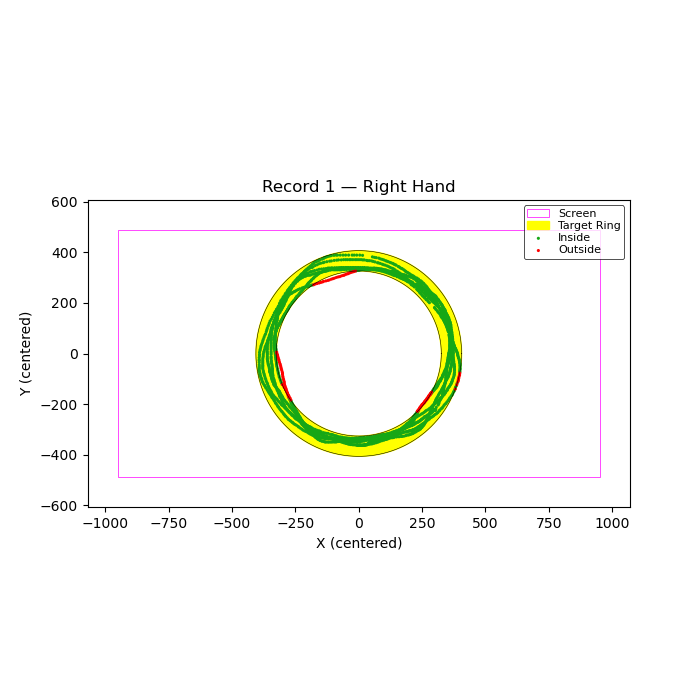

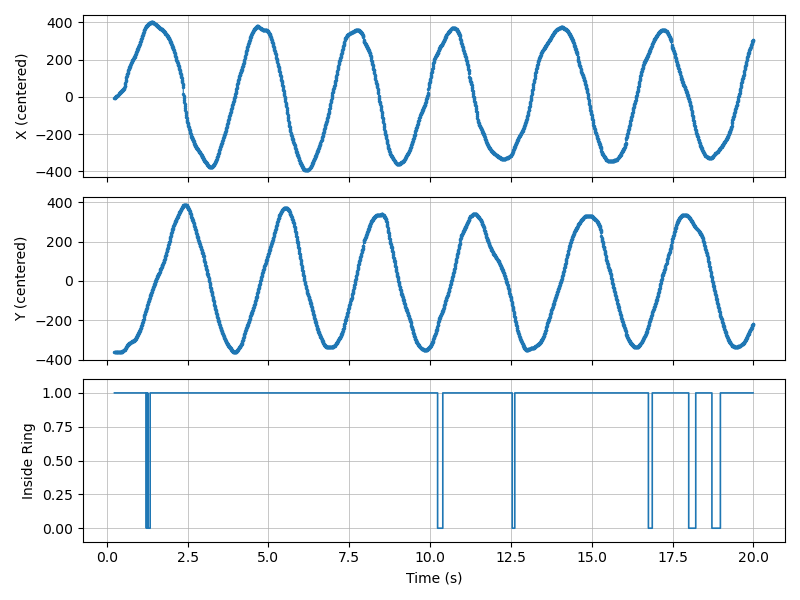


=== RECORD 2 ===


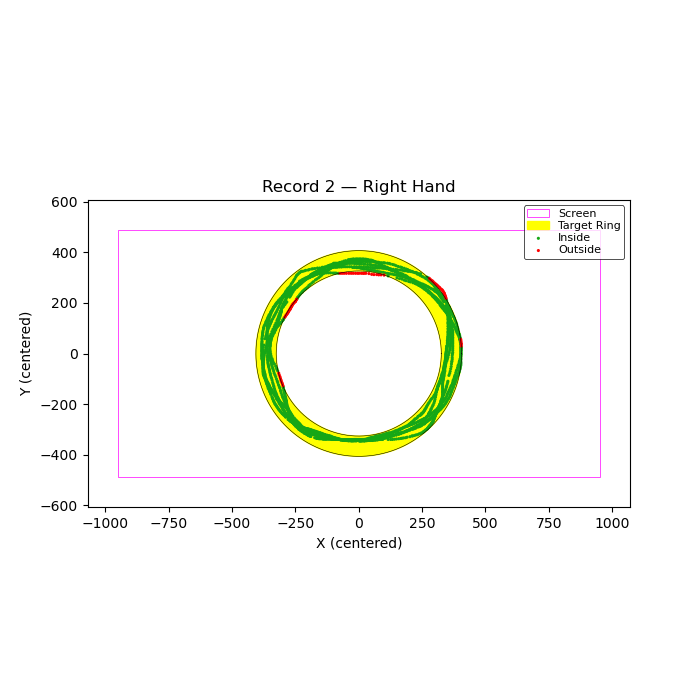

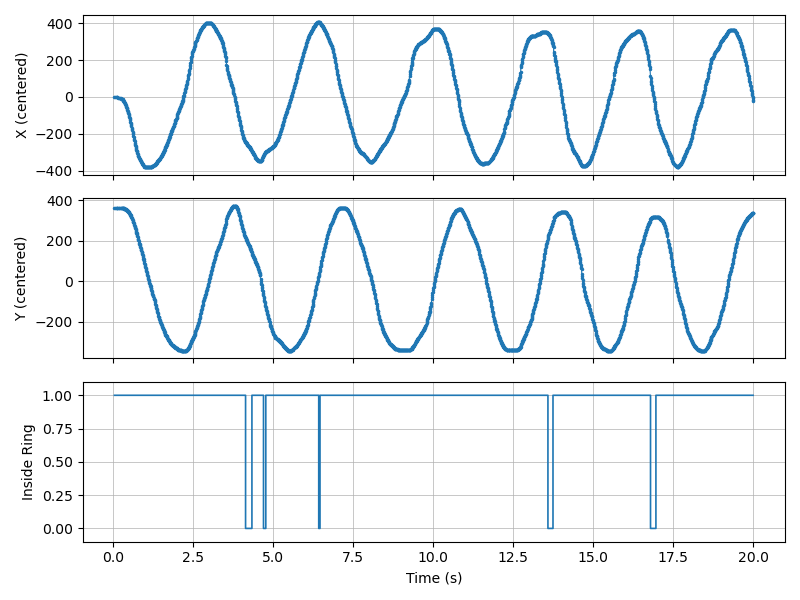


=== RECORD 3 ===


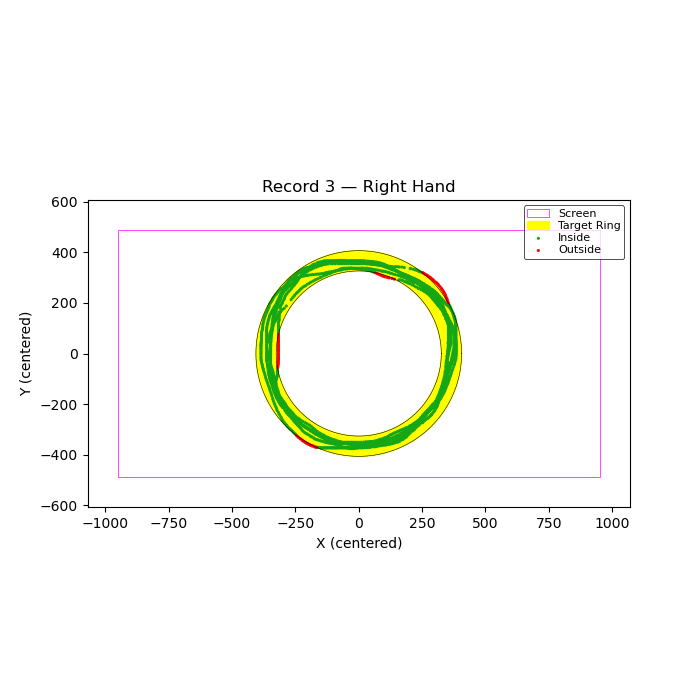

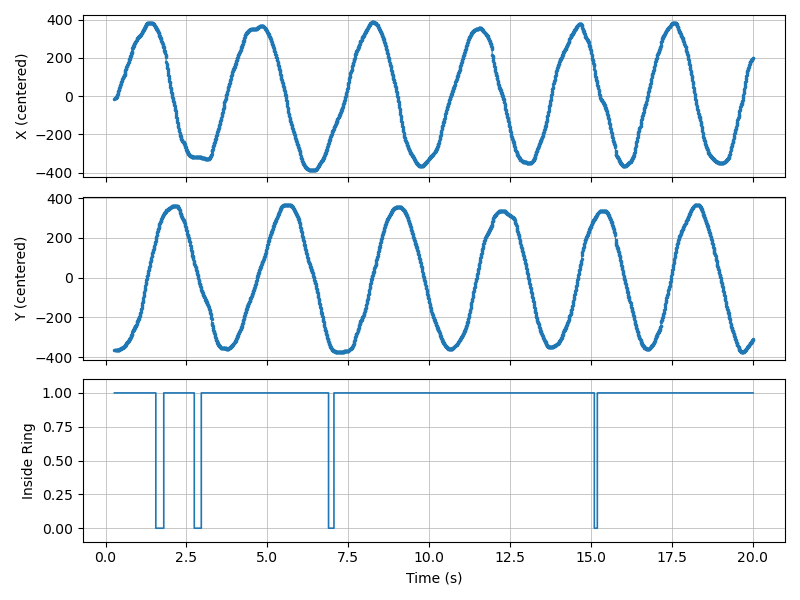


=== RECORD 4 ===


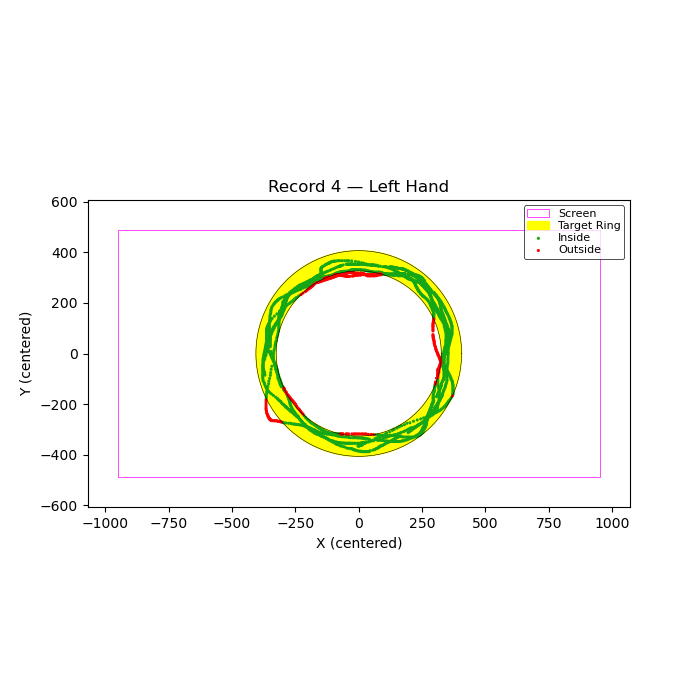

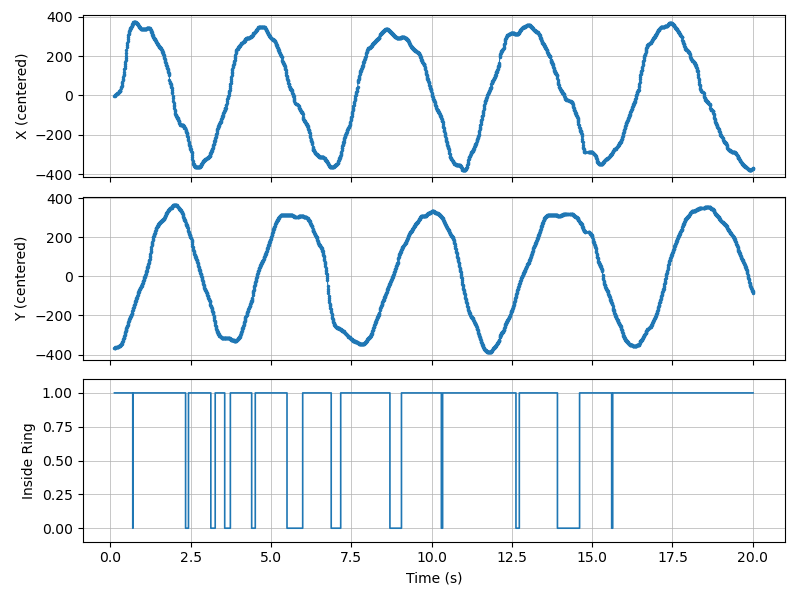


=== RECORD 5 ===


C:\Users\etulyon1\AppData\Local\Temp\ipykernel_19340\1482209579.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(7,7))


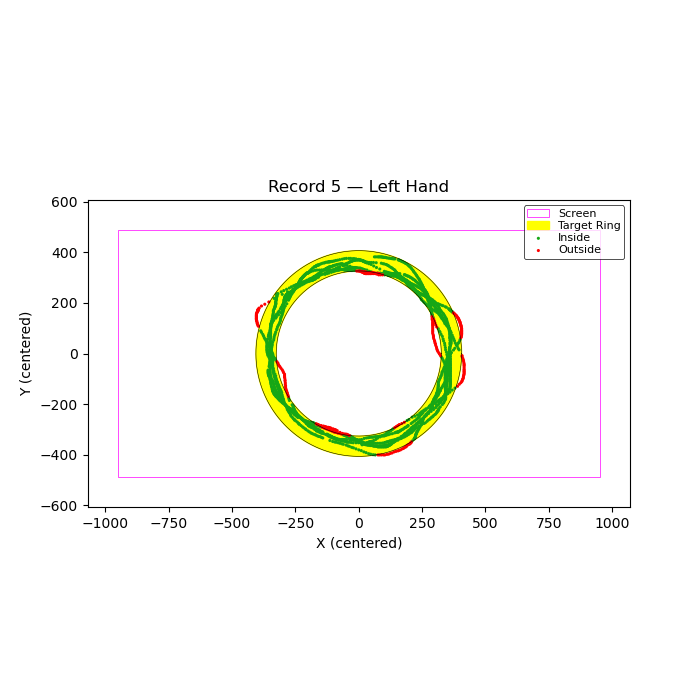

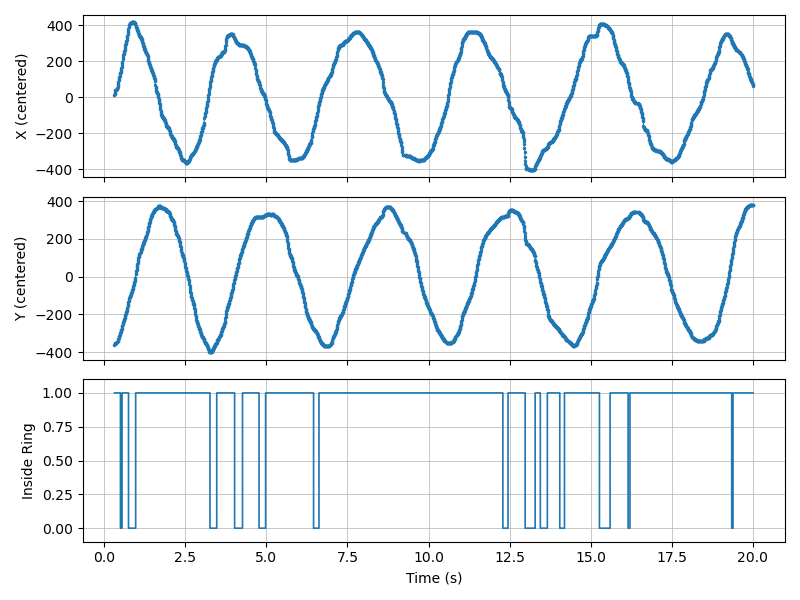


=== RECORD 6 ===


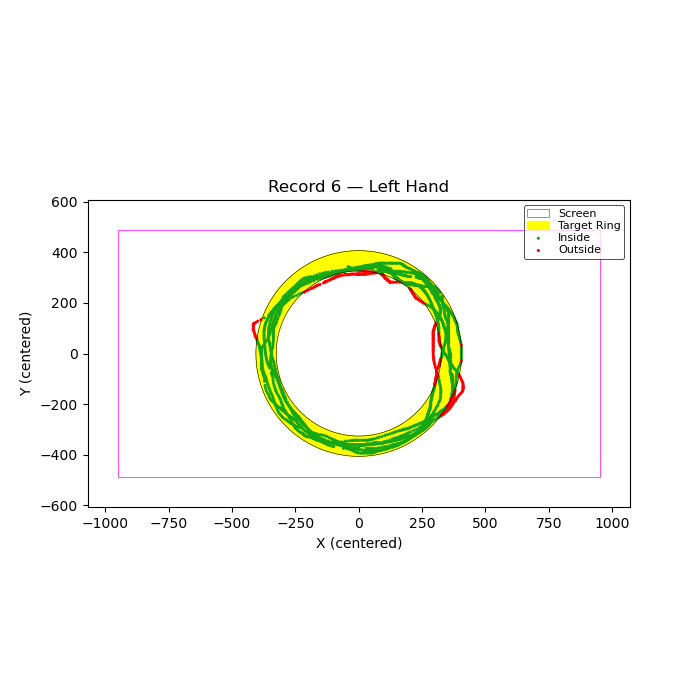

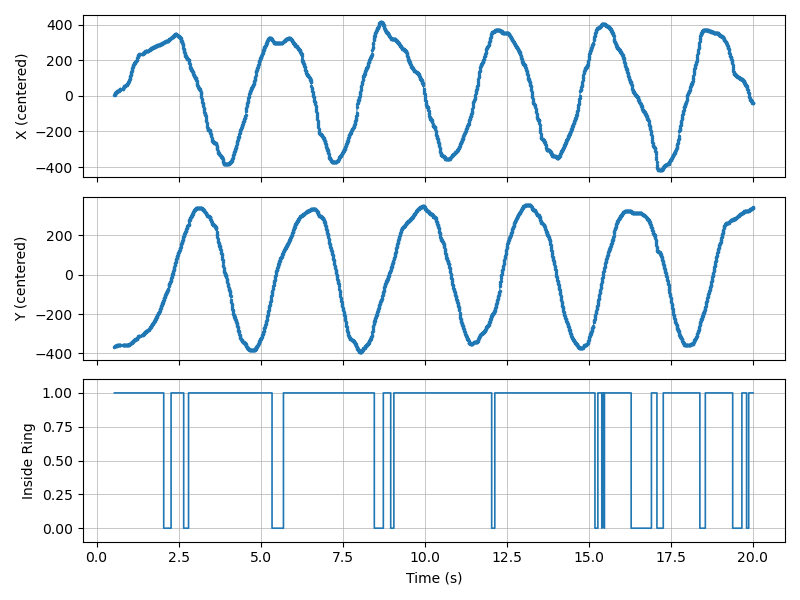

Parsed metadata and cycles:
 metadata keys:  ['software mouseReMoCo;version 1.3.0;isWithLSL false;screenWidth 1902;screenHeight 973;centerX 951;centerY 486;autoStart 3600;cycleMaxNumber 6;cycleDuration 20;borderColor java.awt.Color[r', 'g', 'b']
 cycles detected: [(1763947336795, 1763947356799), (1763947376805, 1763947396812), (1763947416813, 1763947436829), (1763947456829, 1763947476840), (1763947496840, 1763947516854), (1763947536858, 1763947556865)]

=== Per-trial metrics ===
 trial  n_points  mean_speed  max_speed  mean_radial_dev  median_radial_dev  time_inside_ratio  drift_deg  dominant_freq_hz
     1      2457      1.6804    10.9353          16.7342            14.1436             0.9532  2215.3168            0.1221
     2      2470      1.5043    12.7174          16.0269            15.1698             0.9676  2164.1918            0.2699
     3      2451      1.6605    16.8536          13.5162            10.1463             0.9633  2194.6929            0.3173
     4      2419    

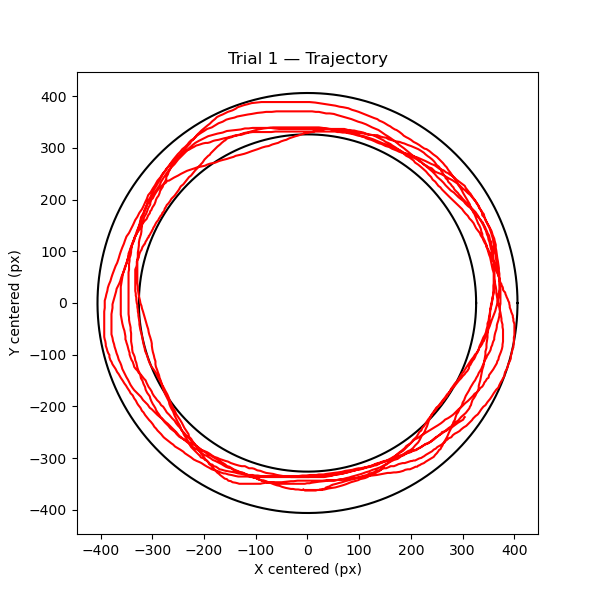

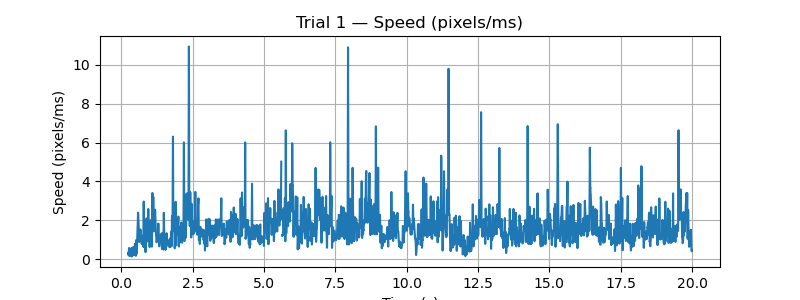

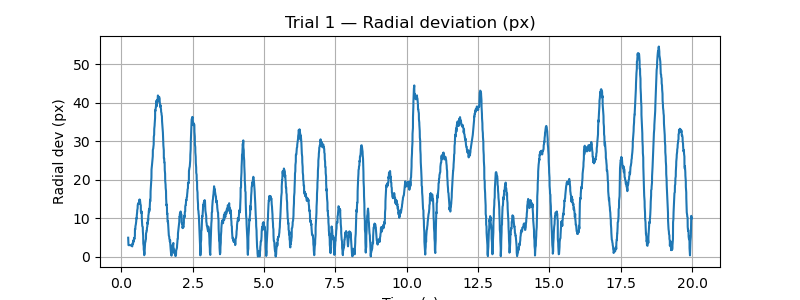

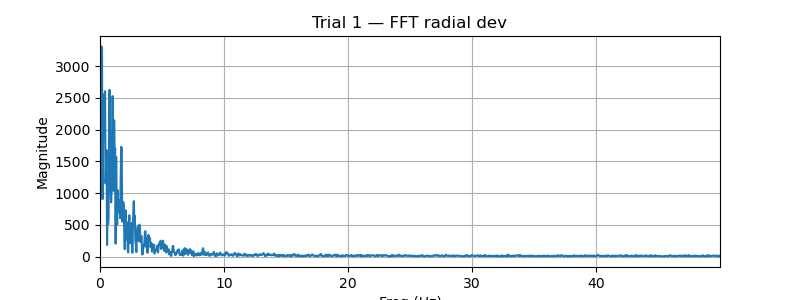

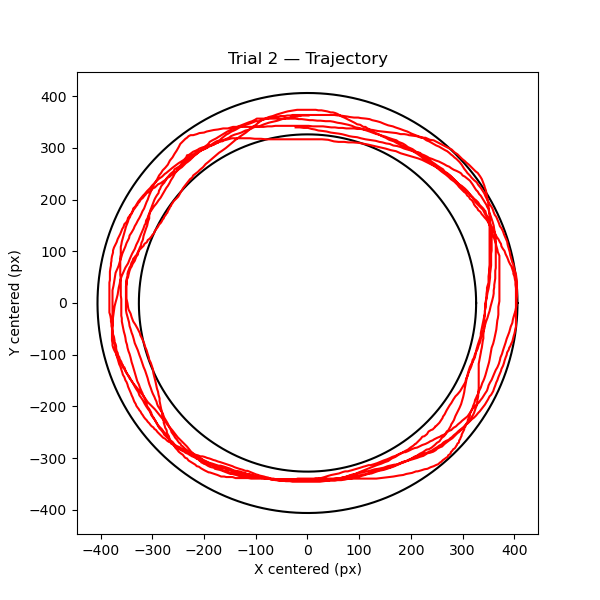

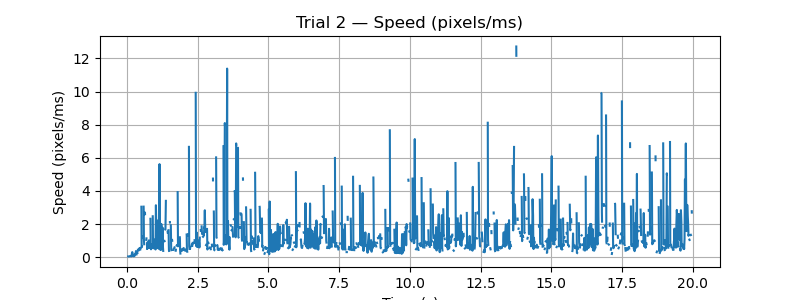

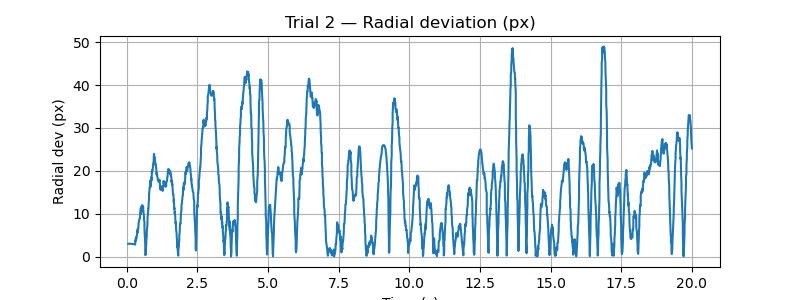

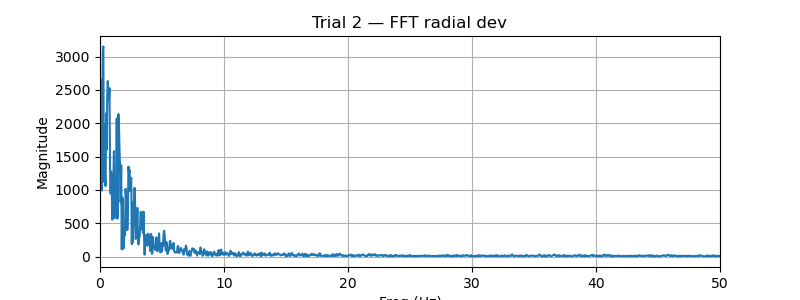

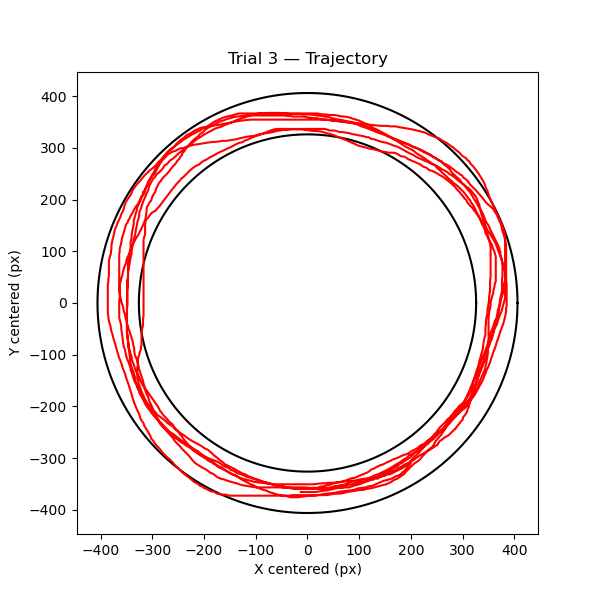

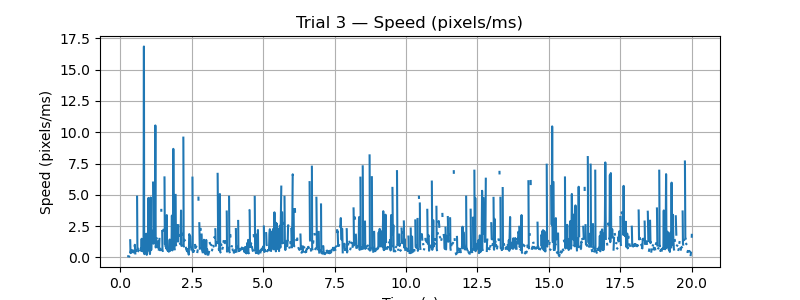

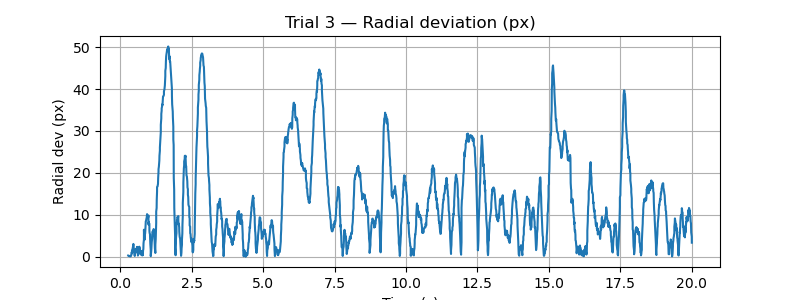

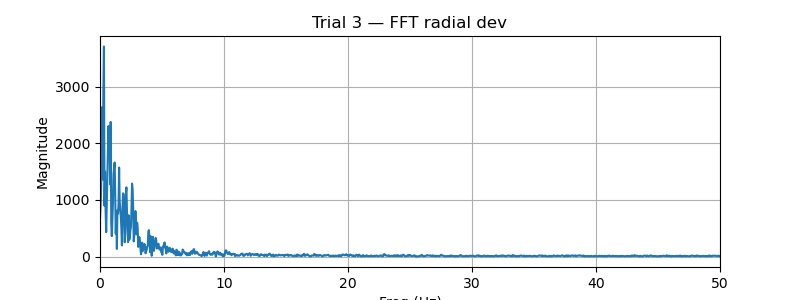

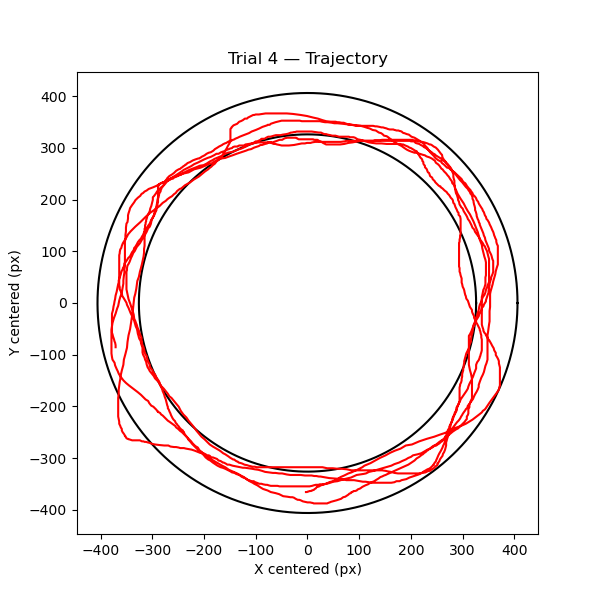

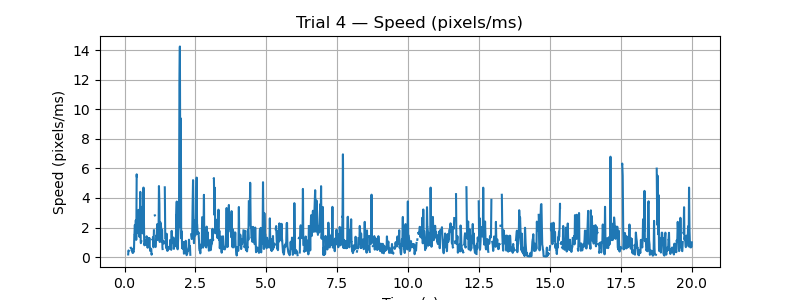

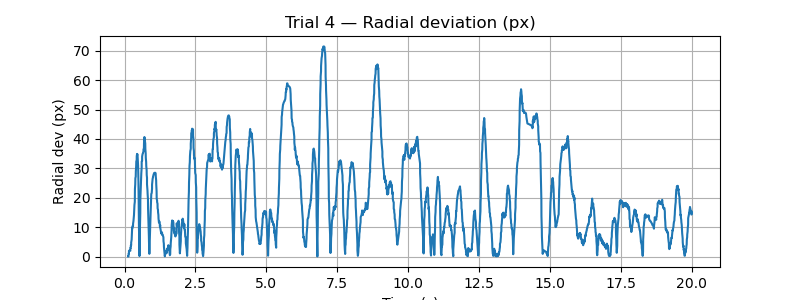

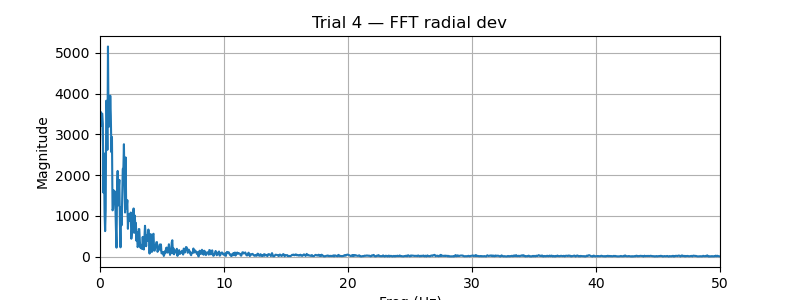

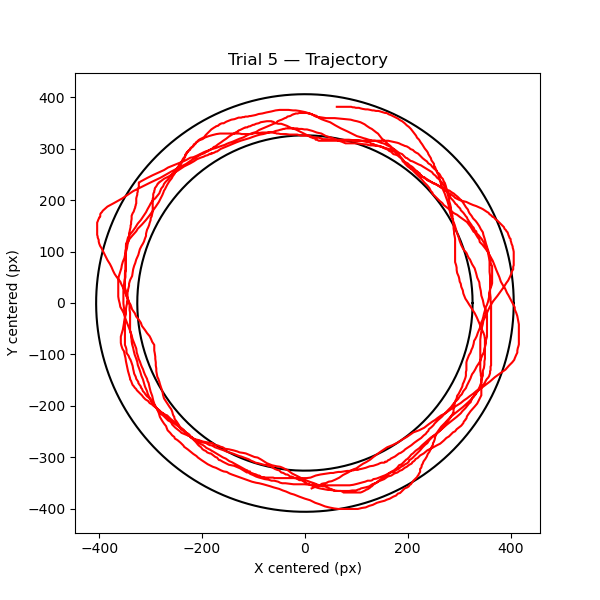

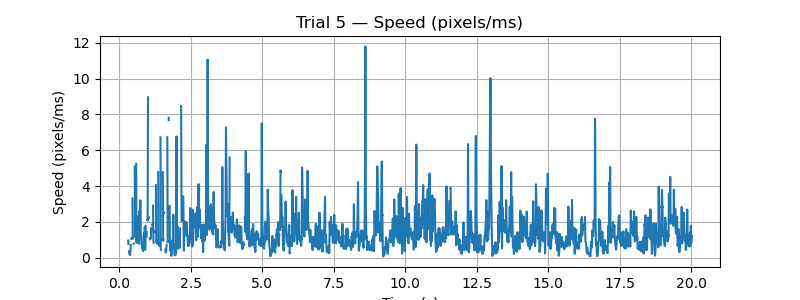

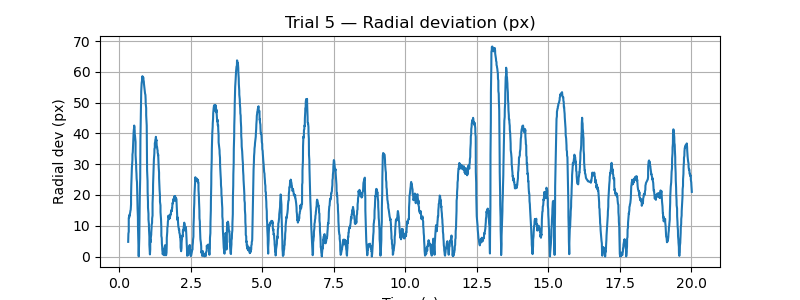

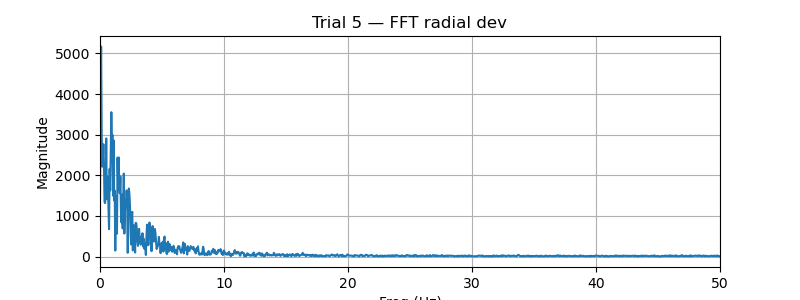

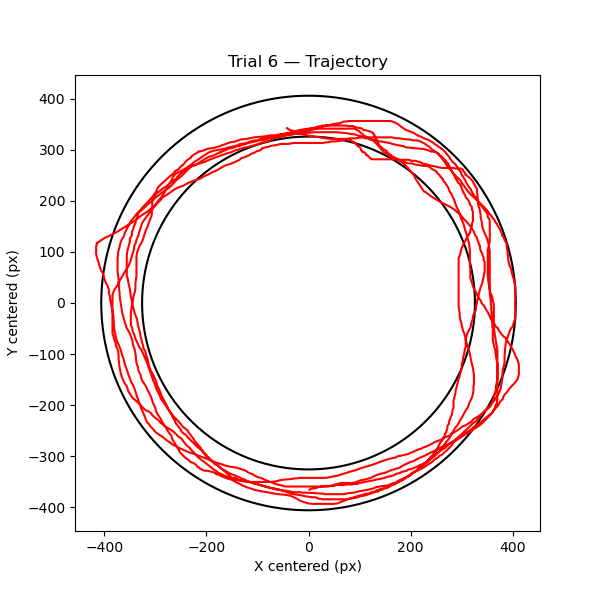

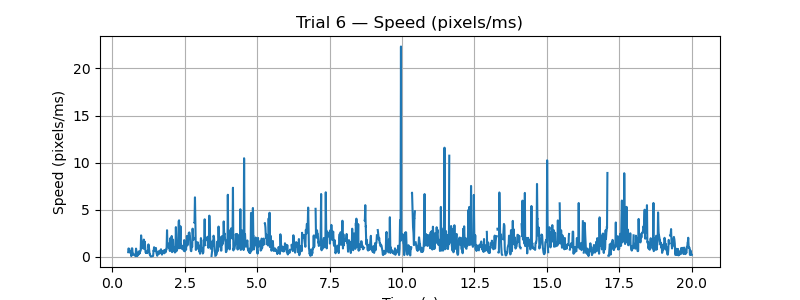

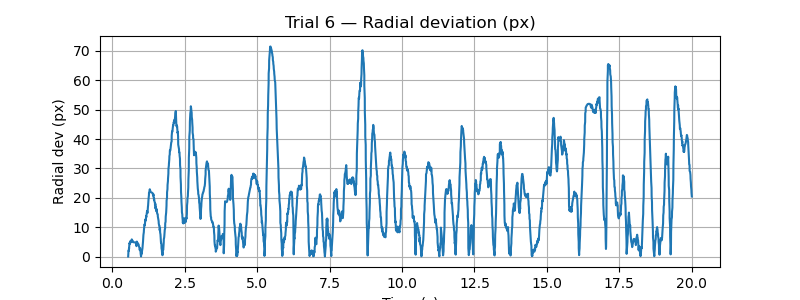

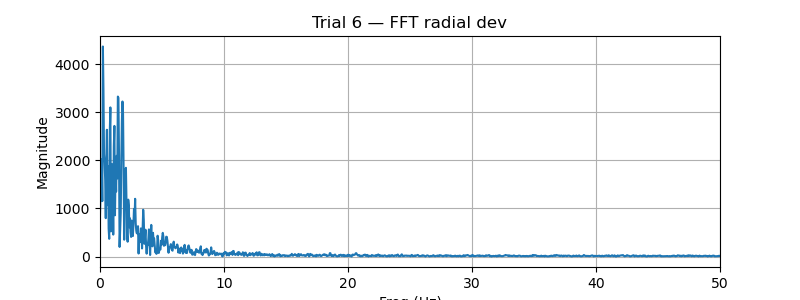

In [6]:
# =====================================================================
# README — How to use this section
# =====================================================================
# This section processes own generated mouse trajectory recordings from MouseReMoCo.
#
# TASK STRUCTURE:
#   • 6 cycles ("records")
#   • Each cycle lasts ~20 seconds ON, then ~20 seconds OFF
#   • Cycles 1–3  → Right Hand
#   • Cycles 4–6  → Left Hand
#   • Direction : Clockwise
#
# =====================================================================



# =====================================================================
# SECTION 1 — MARKER FILE  →  METADATA  →  CYCLE TIMES
# =====================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("=== LOADING MARKERS ===")

markers_raw = []

with open("records/marker.csv", "r") as f:
    for line in f:
        L = line.strip()
        if not L:
            continue

        # Header (semicolon fields)
        if ";" in L and "," not in L:
            markers_raw.append(L.split(";"))
            continue

        # Timestamped events (comma-separated)
        if "," in L:
            markers_raw.append([p.strip() for p in L.split(",")])
            continue

        # Summary rows (space-separated)
        markers_raw.append(L.split())

print("Loaded", len(markers_raw), "marker rows")



# =====================================================================
# EXTRACT METADATA
# =====================================================================
header_line = markers_raw[0]
metadata = {}

for p in header_line:
    if "=" in p:
        k, v = p.split("=", 1)
        v = v.replace("java.awt.Color", "")
        metadata[k.strip()] = v.strip()

def auto(v):
    try:
        return float(v) if "." in v else int(v)
    except:
        return v

metadata_clean = {k: auto(v) for k, v in metadata.items()}

print("\n=== METADATA ===")
for k, v in metadata_clean.items():
    print(f"{k:20s} = {v}")



# =====================================================================
# EXTRACT CYCLE START/STOP
# =====================================================================
starts, stops = [], []

for row in markers_raw:
    if len(row) < 3:
        continue

    ts = row[1]
    event = row[2]

    if not ts.isdigit():
        continue

    t = int(ts)

    if "DoRecord" in event:
        starts.append(t)
    if "DoPause" in event:
        stops.append(t)

cycles = list(zip(starts, stops))

print("\n=== CYCLES DETECTED ===")
for i, (s, e) in enumerate(cycles):
    print(f"Cycle {i+1}: {s}  →  {e}   ({(e-s)/1000:.2f}s)")



# =====================================================================
# EXTRACT SCREEN + TASK PARAMETERS
# =====================================================================
screen_w = metadata_clean.get("screenWidth", 1902)
screen_h = metadata_clean.get("screenHeight", 973)
centerX  = metadata_clean.get("centerX", screen_w/2)
centerY  = metadata_clean.get("centerY", screen_h/2)

R_out  = metadata_clean.get("externalRadius", 406)
R_in   = metadata_clean.get("internalRadius", 326)
R_task = metadata_clean.get("taskRadius", 365.5)

print("\n=== TASK GEOMETRY ===")
print("Screen:", screen_w, "x", screen_h)
print("Center:", centerX, centerY)
print("Radii → Inner:", R_in, "Outer:", R_out, "Task:", R_task)



# =====================================================================
# SECTION 2 — LOAD MOUSE DATA
# =====================================================================
print("\n=== LOADING MOUSE DATA ===")

df = pd.read_csv("records/data.csv", skiprows=4, header=None)
df = df.astype(float)
df.columns = ["timestamp", "x", "y", "inTarget"]

print("Mouse samples:", df.shape, "rows")

# Normalize timestamps
T0 = int(df["timestamp"].iloc[0])
df["t"] = (df["timestamp"] - T0) / 1000.0



# =====================================================================
# SECTION 3 — GEOMETRY (RINGS)
# =====================================================================
theta = np.linspace(0, 2*np.pi, 600)
x_outer = R_out * np.cos(theta)
y_outer = R_out * np.sin(theta)
x_inner = R_in  * np.cos(theta)
y_inner = R_in  * np.sin(theta)

xs_ring = np.concatenate([x_outer, x_inner[::-1]])
ys_ring = np.concatenate([y_outer, y_inner[::-1]])



# =====================================================================
# SECTION 4 — SPLIT DATASET INTO CYCLES
# =====================================================================
cycle_dfs = []
for (start, end) in cycles:
    d = df[(df.timestamp >= start) & (df.timestamp <= end)].copy()
    d["t_cycle"] = (d["timestamp"] - start) / 1000.0
    cycle_dfs.append(d)



# =====================================================================
# SECTION 5 — PLOT ALL SIX RECORDS
# =====================================================================
for i, d in enumerate(cycle_dfs):

    print(f"\n=== RECORD {i+1} ===")

    # Hand assignment
    hand = "Right Hand" if i < 3 else "Left Hand"

    # ----------------------------------------
    # CIRCULAR TRAJECTORY
    # ----------------------------------------
    fig = plt.figure(figsize=(7,7))
    ax = plt.gca()

    # SCREEN rectangle
    screen_rect = patches.Rectangle(
        (-centerX, -centerY),
        screen_w,
        screen_h,
        linewidth=0.5,
        edgecolor="magenta",
        facecolor="none",
        label="Screen")
    ax.add_patch(screen_rect)

    # Yellow ring
    ax.fill(xs_ring, ys_ring, color="#FFFF00", alpha=1.0, label="Target Ring")
    ax.plot(x_outer, y_outer, color="black", linewidth=0.4)
    ax.plot(x_inner, y_inner, color="black", linewidth=0.4)

    # Mouse trajectory
    x = d["x"].values - centerX
    y = d["y"].values - centerY
    r = np.hypot(x, y)
    inside = (r >= R_in) & (r <= R_out)

    ax.scatter(x[inside],  y[inside],  s=5, c="#16A716", edgecolors="none", label="Inside")
    ax.scatter(x[~inside], y[~inside], s=5, c="#FF0000", edgecolors="none", label="Outside")

    pad = 120
    ax.set_xlim(-centerX - pad, centerX + pad)
    ax.set_ylim(-centerY - pad, centerY + pad)
    ax.set_aspect("equal")

    plt.title(f"Record {i+1} — {hand}")
    plt.xlabel("X (centered)")
    plt.ylabel("Y (centered)")

    leg = ax.legend(loc="upper right", fontsize=8, frameon=True, fancybox=True,
                    borderpad=0.3, labelspacing=0.2)
    leg.get_frame().set_edgecolor("black")
    leg.get_frame().set_linewidth(0.6)

    plt.show()


    # ----------------------------------------
    # TIME SERIES
    # ----------------------------------------
    fig_ts, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

    axs[0].plot(d["t_cycle"], x, marker='.', markersize=3, linewidth=0.8)
    axs[0].set_ylabel("X (centered)")
    axs[0].grid(True, linewidth=0.5)

    axs[1].plot(d["t_cycle"], y, marker='.', markersize=3, linewidth=0.8)
    axs[1].set_ylabel("Y (centered)")
    axs[1].grid(True, linewidth=0.5)

    axs[2].step(d["t_cycle"], inside.astype(int), where='mid', linewidth=1.2)
    axs[2].set_ylabel("Inside Ring")
    axs[2].set_ylim(-0.1, 1.1)
    axs[2].set_xlabel("Time (s)")
    axs[2].grid(True, linewidth=0.5)

    plt.tight_layout()
    plt.show()
    
# ---------------------------
# GO-FURTHER ANALYSIS CELL
# ---------------------------

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from math import degrees, atan2

# ---------- 0. Files / paths ----------
markers_path = "records/marker.csv"
mouse_path   = "records/data.csv"
# out_csv = "per_trial_metrics.csv"

# ---------- 1. Robustly read markers ----------
markers_raw = []
with open(markers_path, "r") as f:
    for line in f:
        L = line.strip()
        if not L:
            continue
        if ";" in L and "," not in L:
            markers_raw.append(L.split(";"))
            continue
        if "," in L:
            markers_raw.append([p.strip() for p in L.split(",")])
            continue
        markers_raw.append(L.split())

# metadata from header line
header_line = markers_raw[0]
metadata = {}
for p in header_line:
    if "=" in p:
        k, v = p.split("=", 1)
        v = v.replace("java.awt.Color", "")
        metadata[k.strip()] = v.strip()

def auto(v):
    try:
        return float(v) if "." in v else int(v)
    except:
        return v
metadata_clean = {k: auto(v) for k, v in metadata.items()}

# extract cycles (DoRecord / DoPause)
starts, stops = [], []
for row in markers_raw:
    if len(row) < 3:
        continue
    ts = row[1]
    event = row[2]
    if not isinstance(ts, str) or not ts.isdigit():
        continue
    t = int(ts)
    if "DoRecord" in event:
        starts.append(t)
    if "DoPause" in event:
        stops.append(t)
cycles = list(zip(starts, stops))

print("Parsed metadata and cycles:")
print(" metadata keys: ", list(metadata_clean.keys()))
print(" cycles detected:", cycles)

# ---------- 2. Load mouse data ----------
df = pd.read_csv(mouse_path, skiprows=4, header=None)
df = df.astype(float)
df.columns = ["timestamp","x","y","inTarget"]

# time base: user-provided baseline (keeps absolute ms as discussed)
T0 = 1763930000000
df["t"] = (df["timestamp"] - T0) / 1000.0   # seconds relative to T0

# geometry (fall back to sensible defaults)
screen_w = metadata_clean.get("screenWidth", 1902)
screen_h = metadata_clean.get("screenHeight", 973)
centerX  = metadata_clean.get("centerX", screen_w/2)
centerY  = metadata_clean.get("centerY", screen_h/2)
R_out  = metadata_clean.get("externalRadius", 406)
R_in   = metadata_clean.get("internalRadius", 326)
R_task = metadata_clean.get("taskRadius", 365.5)

# ---------- 3. Split data into cycles ----------
cycle_dfs = []
for start, end in cycles:
    d = df[(df.timestamp >= start) & (df.timestamp <= end)].copy()
    d["t_cycle"] = (d["timestamp"] - start) / 1000.0
    d["x_c"] = d["x"] - centerX
    d["y_c"] = d["y"] - centerY
    d["radius"] = (d["x_c"]**2 + d["y_c"]**2)**0.5
    d["angle"] = np.arctan2(d["y_c"], d["x_c"])
    cycle_dfs.append(d)

# ---------- 4. Kinematics & smoothing ----------
def compute_kinematics(d):
    if len(d) < 2:
        d["vx"] = np.nan; d["vy"] = np.nan; d["speed"] = np.nan
        d["radius_smooth"] = d["radius"].values if "radius" in d else np.nan
        d["radial_dev"] = np.nan
        return d
    t_ms = d["timestamp"].values.astype(float)
    vx = np.gradient(d["x"].values, t_ms)   # pixels per ms
    vy = np.gradient(d["y"].values, t_ms)
    speed = np.sqrt(vx**2 + vy**2)
    # smoothing window (odd)
    win = min(101, max(5, (len(speed)//2)*2+1))
    try:
        speed_s = signal.savgol_filter(speed, win_length=win, polyorder=3)
        radius_s = signal.savgol_filter(d["radius"].values, win_length=win, polyorder=3)
    except Exception:
        speed_s = speed
        radius_s = d["radius"].values
    d["vx"] = vx; d["vy"] = vy; d["speed"] = speed_s
    d["radius_smooth"] = radius_s
    d["radial_dev"] = np.abs(radius_s - R_task)
    return d

for i in range(len(cycle_dfs)):
    cycle_dfs[i] = compute_kinematics(cycle_dfs[i])

# ---------- 5. FFT on radial deviation ----------
def radial_fft(d):
    rd = d["radial_dev"].values
    t = d["t_cycle"].values
    if len(rd) < 8:
        return None
    dt = np.median(np.diff(t))
    y = rd - np.mean(rd)
    w = signal.windows.hann(len(y))
    y = y * w
    N = len(y)
    yf = np.abs(np.fft.rfft(y))
    xf = np.fft.rfftfreq(N, d=dt)
    return xf, yf

fft_results = [radial_fft(d) for d in cycle_dfs]

# ---------- 6. Compute per-trial metrics ----------
metrics = []
for i, d in enumerate(cycle_dfs):
    if len(d) == 0:
        metrics.append({"trial":i+1, "n_points":0})
        continue
    mean_speed = float(np.nanmean(d["speed"]))
    max_speed  = float(np.nanmax(d["speed"]))
    mean_radial = float(np.nanmean(d["radial_dev"]))
    median_radial = float(np.nanmedian(d["radial_dev"]))
    time_inside = float(np.sum((d["radius"]>=R_in)&(d["radius"]<=R_out)) / len(d))
    ang = np.unwrap(d["angle"].values)
    drift_deg = float(degrees(ang[-1] - ang[0])) if len(ang)>1 else 0.0
    fft_res = fft_results[i]
    dom_f = float(np.nan) 
    if fft_res is not None:
        xf, yf = fft_res
        if len(xf)>1:
            idx = np.argmax(yf[1:]) + 1
            dom_f = float(xf[idx])
    metrics.append({
        "trial": i+1, "n_points": len(d),
        "mean_speed": mean_speed, "max_speed": max_speed,
        "mean_radial_dev": mean_radial, "median_radial_dev": median_radial,
        "time_inside_ratio": time_inside, "drift_deg": drift_deg,
        "dominant_freq_hz": dom_f
    })

metrics_df = pd.DataFrame(metrics)

# ---------- 7. Composite score (normalized, example weights) ----------
def norm_inv(arr):
    a = np.array(arr, dtype=float)
    a_nonan = a[~np.isnan(a)]
    if len(a_nonan)==0: return np.full_like(a, np.nan)
    vmin, vmax = a_nonan.min(), a_nonan.max()
    if vmax==vmin: return np.ones_like(a)
    return 1.0 - (a - vmin)/(vmax - vmin)

def norm(arr):
    a = np.array(arr, dtype=float)
    a_nonan = a[~np.isnan(a)]
    if len(a_nonan)==0: return np.full_like(a, np.nan)
    vmin, vmax = a_nonan.min(), a_nonan.max()
    if vmax==vmin: return np.ones_like(a)
    return (a - vmin)/(vmax - vmin)

m = metrics_df.copy()
comp_radial = norm_inv(m["mean_radial_dev"].values)
comp_time_in = norm(m["time_inside_ratio"].values)
comp_speed = norm(1.0/(1.0 + m["mean_speed"].values))   # prefer moderate (lower mean speed)
comp_drift = norm_inv(np.abs(m["drift_deg"].values))
w1, w2, w3, w4 = 0.35, 0.30, 0.20, 0.15
m["composite_score"] = w1*comp_radial + w2*comp_time_in + w3*comp_speed + w4*comp_drift
m["hand"] = ["Right" if int(r)<=3 else "Left" for r in m["trial"]]

agg_hand = m.groupby("hand").agg({
    "composite_score":["mean","std"],
    "mean_radial_dev":["mean"],
    "time_inside_ratio":["mean"]
}).round(4)

# ---------- 8. Print results ----------
print("\n=== Per-trial metrics ===")
print(metrics_df.round(4).to_string(index=False))
print("\n=== Composite per trial ===")
print(m[["trial","hand","composite_score"]].round(4).to_string(index=False))
print("\n=== Aggregated by hand ===")
print(agg_hand)

# metrics_df.to_csv(out_csv, index=False)
# print(f"\nSaved per-trial metrics CSV to: {out_csv}")

# ---------- 9. Plots (one figure per plot as required) ----------
# Precompute ring coordinates (centered)
theta = np.linspace(0,2*np.pi,600)
x_outer = R_out * np.cos(theta)
y_outer = R_out * np.sin(theta)
x_inner = R_in  * np.cos(theta)
y_inner = R_in  * np.sin(theta)

for i, d in enumerate(cycle_dfs):
    if len(d)==0:
        continue

    # Trajectory
    fig = plt.figure(figsize=(6,6))
    plt.plot(x_outer, y_outer, color="black")
    plt.plot(x_inner, y_inner, color="black")
    plt.plot(d["x_c"].values, d["y_c"].values, color="red")
    plt.gca().set_aspect("equal")
    plt.title(f"Trial {i+1} — Trajectory")
    plt.xlabel("X centered (px)"); plt.ylabel("Y centered (px)")
    plt.show()

    # Speed time series
    fig = plt.figure(figsize=(8,3))
    plt.plot(d["t_cycle"].values, d["speed"].values)
    plt.title(f"Trial {i+1} — Speed (pixels/ms)")
    plt.xlabel("Time (s)"); plt.ylabel("Speed (pixels/ms)")
    plt.grid(True)
    plt.show()

    # Radial deviation
    fig = plt.figure(figsize=(8,3))
    plt.plot(d["t_cycle"].values, d["radial_dev"].values)
    plt.title(f"Trial {i+1} — Radial deviation (px)")
    plt.xlabel("Time (s)"); plt.ylabel("Radial dev (px)")
    plt.grid(True)
    plt.show()

    # FFT (radial deviation)
    res = radial_fft(d)
    if res is not None:
        xf, yf = res
        fig = plt.figure(figsize=(8,3))
        plt.plot(xf, yf)
        plt.title(f"Trial {i+1} — FFT radial dev")
        plt.xlabel("Freq (Hz)"); plt.ylabel("Magnitude")
        plt.xlim(0, min(50, xf.max()))
        plt.grid(True)
        plt.show()

<a id="4-title"></a>
# 4. [Discussion & Conclusion](#total-title)

In [ ]:
# Title 1
# Add your content for Title 1 here.

In [ ]:
# https://nbconvert.readthedocs.io/en/latest/removing_cells.html

# https://github.com/msm1089/ipynbname/issues/17#issuecomment-1293269863


from traitlets.config import Config
from nbconvert.exporters import HTMLExporter
from nbconvert.preprocessors import TagRemovePreprocessor
from IPython import get_ipython


def get_notebook_name():
    """
    Get the current notebook name (without extension).
    """
    ip = get_ipython()
    path = None
    if "__vsc_ipynb_file__" in ip.user_ns:
        path = ip.user_ns["__vsc_ipynb_file__"]

    return path.split("/")[-1].split(".")[0]


# Get the notebook name
notebook_file_name = get_notebook_name()


# Setup config
c = Config()

# Configure tag removal - be sure to tag your cells to remove  using the
# words remove_cell to remove cells. You can also modify the code to use
# a different tag word
c.TagRemovePreprocessor.remove_cell_tags = ("remove",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ("remove_output",)
c.TagRemovePreprocessor.remove_input_tags = ("hide",)
c.TagRemovePreprocessor.enabled = True
c.HTMLExporter.preprocessors = ["nbconvert.preprocessors.TagRemovePreprocessor"]

# ensure the graphics are included in the html
c.HTMLExporter.embed_images = True
# do not show the input code cells (distracts from the output)
c.HTMLExporter.exclude_output_prompt = True
c.HTMLExporter.exclude_input_prompt = True

# Configure the exporter
exporter = HTMLExporter(config=c)
exporter.register_preprocessor(TagRemovePreprocessor(config=c), True)


# run our exporter - returns a tuple - first element with html,
# second with notebook metadata
output = HTMLExporter(config=c).from_filename(notebook_file_name + ".ipynb")

# Write to output html file
with open(notebook_file_name + ".html", "w") as f:
    f.write(output[0])

# open the file with the operating system
import os

# if osx use open, if linux use xdg-open, if windows use start
try:
    if os.name == "posix":
        if os.uname().sysname == "Darwin":
            # macOS
            errorCode = os.system("open " + notebook_file_name + ".html")
        else:
            # Linux
            errorCode = os.system("xdg-open " + notebook_file_name + ".html")
    elif os.name == "nt":
        # Windows
        errorCode = os.system("start " + notebook_file_name + ".html")
    else:
        print("Unsupported OS")
except Exception as e:
    print("Error opening file: ", e)